In [24]:
run MoodTracesDataLoader.ipynb

0.2.0_4


In [2]:
run DataTranformation.ipynb

In [3]:
run DataTranformationAverages.ipynb

In [4]:
run AutoEncoder.ipynb

0.2.0_4


In [5]:
run ClassifierMultiDimen.ipynb

In [6]:
run ClassifierPersonalised.ipynb

In [7]:
run Plots.ipynb

In [8]:
### read mobility data ###
ld = LocationData()
ld.readLocationData(precision_value=4) # read file
ld.filterUser(30) #filter users with min 60 days
print len(ld.users)
ld.convertToEqualTimeSeries(30 * 60 * 1000) # convert to time series of 30mins
dt = ld.createUserDailyTrajectoryLists() # create daily trajectories of users 

82


In [37]:
### read mood data ###
pd = PhqData()
pd.readPhqData()
pd.computeScores(ld.users, 30)
# pd.computeDivergence()
# pd.convertTo2Labels(sd_ratio=0.25)
# len(list(set(m[0] for m in pd.phq_scores)))


Initial user count 6705
User count 5616
Min time ratio 0.500023134225
Number of users 44


In [38]:
for d in pd.phq_scores:
    d.append(d[2]) # use the score instead of labels 

In [41]:
pd.phq_scores[0]


['5e65acd0-4860-4f6c-9606-e088238087c6', 16585, 12, 6, 12]

In [42]:
### merge data ###
mlm = PhqLocMergeForDivergence()
mlm.mergeData(dt, pd.phq_scores)

In [43]:
# transform mobility data
users = list(set([m[0] for m in mlm.data]))
d1 = approachAvg1(lm_data=mlm.data, users=users) # Rescaling lat and lons
d2 = approachAvg2(lm_data=mlm.data, users=users) # Computing displacement changes
d3 = approachAvg3(lm_data=mlm.data, users=users) # Computing displacement [normalised]
d4 = approachAvg4(lm_data=mlm.data, users=users, topn=20) # Computing displacement [normalised]
print len(d1), len(d2), len(d3), len(d4)


2202 2202 2202 2202


In [56]:
filtered_users = []
for u in users:
    ud = [d for d in d1 if d[0]==u]
    if len(ud) > 30: 
        filtered_users.append(u)
print len(filtered_users) 

24


In [594]:
run AutoEncoder.ipynb

0.2.0_4


In [62]:
# run ClassifierMultiDimen.ipynb

In [63]:
# # data = [d2,d3,d4] 
# # model_generic = ClassifierMultiDimenHelper.compute_svm_accuracy(data, is_leave_one_user=True, samples_req=10, users=filtered_users)
# data1 = [d2] 
# data2 = [d3] 
# data3 = [d4] 
# data4 = [d2,d3] 
# data5 = [d2,d4] 
# data6 = [d3,d4] 
# data7 = [d2,d3,d4] 

# # model_generic1_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data1, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# # model_generic2_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data2, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# # model_generic3_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data3, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# # model_generic4_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data4, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# # model_generic5_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data5, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# # model_generic6_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data6, is_leave_one_user=True, samples_req=10, users=filtered_users) 
# model_generic7_sd4 = ClassifierMultiDimenHelper.compute_svm_accuracy(data7, is_leave_one_user=True, samples_req=10, users=filtered_users) 


In [64]:
# models = [model_generic1_sd4, model_generic2_sd4, model_generic3_sd4, 
#           model_generic4_sd4, model_generic5_sd4, model_generic6_sd4, model_generic7_sd4]
# model_names = ['d2','d3','d4','d23','d24','d34','d234']
# label_dict={1:'Positive', 0:'Negative'}
# Plots.multiModel(models, model_names,label_dict=label_dict)

In [65]:
run ClassifierPersonalisedDivergence.ipynb

In [66]:
data1 = [d2] 
data2 = [d3] 
data3 = [d4] 
data4 = [d2,d3] 
data5 = [d2,d4] 
data6 = [d3,d4] 
data7 = [d2,d3,d4] 

# model_pers1 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data1, iteration=20, users=filtered_users, min_days=30) 
# model_pers2 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data2, iteration=20, users=filtered_users, min_days=30) 
# model_pers3 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data3, iteration=20, users=filtered_users, min_days=30) 
# model_pers4 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data4, iteration=20, users=filtered_users, min_days=30) 
# model_pers5 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data5, iteration=20, users=filtered_users, min_days=30) 
# model_pers6 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data6, iteration=20, users=filtered_users, min_days=30) 
# model_pers7 = ClassifierPersonalisedDivergenceHelper.compute_svm_accuracy(data7, iteration=20, users=filtered_users, min_days=30) 


In [805]:
run Plots.ipynb

     labels  freq_mean   freq_sd  acc_mean0    acc_sd0  acc_mean1    acc_sd1  \
0  Negative  50.746102  9.378648  78.348949  22.081961  64.927830  26.104868   
1  Positive  49.253898  9.378648  67.045455  24.449916  56.818182  25.354825   

   acc_mean2    acc_sd2  acc_mean3    acc_sd3  acc_mean4    acc_sd4  \
0  76.196505  21.633062  77.893138  22.075645  82.856419  20.858933   
1  67.204017  23.532037  66.411205  25.592114  71.670190  23.335401   

   acc_mean5    acc_sd5  acc_mean6    acc_sd6  
0  76.956191  21.052649  80.957204  22.170780  
1  66.939746  22.460185  72.013742  24.237958  
[0, 1]


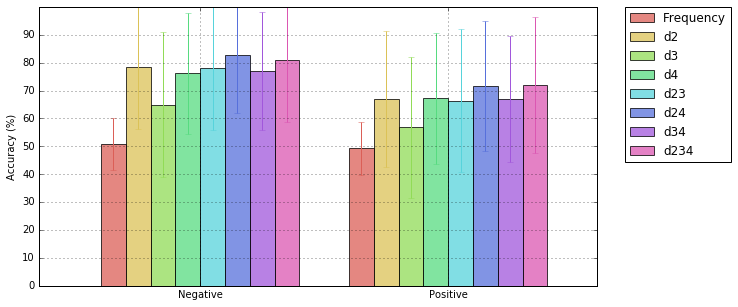

In [806]:
models = [model_pers1_sd0, model_pers2_sd0, model_pers3_sd0, model_pers4_sd0, model_pers5_sd0, model_pers6_sd0, model_pers7_sd0]
model_names = ['d2','d3','d4','d23','d24','d34','d234']
label_dict={1:'Positive', 0:'Negative'}
Plots.multiModel(models, model_names,label_dict=label_dict)

     labels  freq_mean   freq_sd  acc_mean0    acc_sd0  acc_mean1    acc_sd1  \
0  Negative  59.590599  9.693483  85.433575  17.315376  76.206749  21.236127   
1  Positive  40.409401  9.693483  58.483755  26.900909  43.813587  27.969060   

   acc_mean2    acc_sd2  acc_mean3    acc_sd3  acc_mean4    acc_sd4  \
0  81.994874  18.570697  84.814182  19.347151  87.590773  17.504394   
1  56.580243  26.929815  54.840827  27.352420  62.553331  26.014057   

   acc_mean5    acc_sd5  acc_mean6    acc_sd6  
0  83.618112  18.209354  86.715079  18.180477  
1  57.630456  27.596567  61.732852  28.291993  
[0, 1]


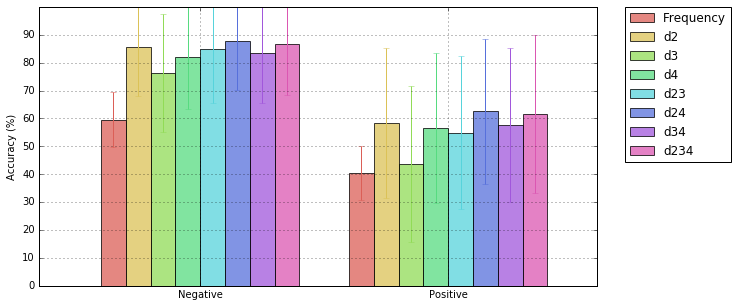

In [807]:
models = [model_pers1_sd4, model_pers2_sd4, model_pers3_sd4, model_pers4_sd4, model_pers5_sd4, model_pers6_sd4, model_pers7_sd4]
model_names = ['d2','d3','d4','d23','d24','d34','d234']
label_dict={1:'Positive', 0:'Negative'}
Plots.multiModel(models, model_names,label_dict=label_dict)

     labels  freq_mean   freq_sd  acc_mean0    acc_sd0  acc_mean1   acc_sd1  \
0  Negative  68.427604  8.834314  90.112832  13.709200  83.993115  17.48876   
1  Positive  31.572396  8.834314  51.370432  31.461413  31.727575  27.63059   

   acc_mean2   acc_sd2  acc_mean3    acc_sd3  acc_mean4    acc_sd4  acc_mean5  \
0  88.506407  14.28496  90.055460  14.489521  92.120864  13.939208  89.978963   
1  50.498339  29.55234  44.601329  28.958078  56.395349  30.642407  47.840532   

     acc_sd5  acc_mean6    acc_sd6  
0  14.869679  91.260279  14.637810  
1  31.556474  53.446844  32.418837  
[0, 1]


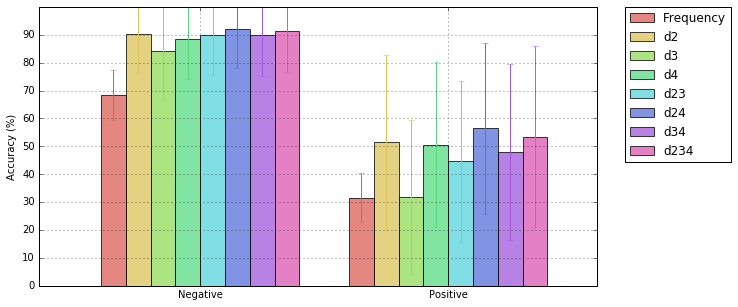

In [808]:
models = [model_pers1_sd2, model_pers2_sd2, model_pers3_sd2, model_pers4_sd2, model_pers5_sd2, model_pers6_sd2, model_pers7_sd2]
model_names = ['d2','d3','d4','d23','d24','d34','d234']
label_dict={1:'Positive', 0:'Negative'}
Plots.multiModel(models, model_names,label_dict=label_dict)